<a href="https://colab.research.google.com/github/Aswin-1121/ICT-DSA/blob/main/model_selection_aswin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
tita =pd.read_csv('/content/titanic_dataset .csv')
tita.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
tita1=tita.copy()

In [142]:
tita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
tita.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Filling missing values

In [144]:
tita['Age'] = tita['Age'].fillna(np.mean(tita['Age']))
tita.isnull().sum()
# using mean method to fill missing values in numerical col


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [145]:
# filling obj dtypes
tita['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [146]:
tita['Embarked'].fillna(tita['Embarked'].mode()[0], inplace=True)
tita.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [147]:
tita['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [148]:
tita['Cabin'].fillna(tita['Cabin'].mode()[0], inplace=True)
tita.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Treating outliers

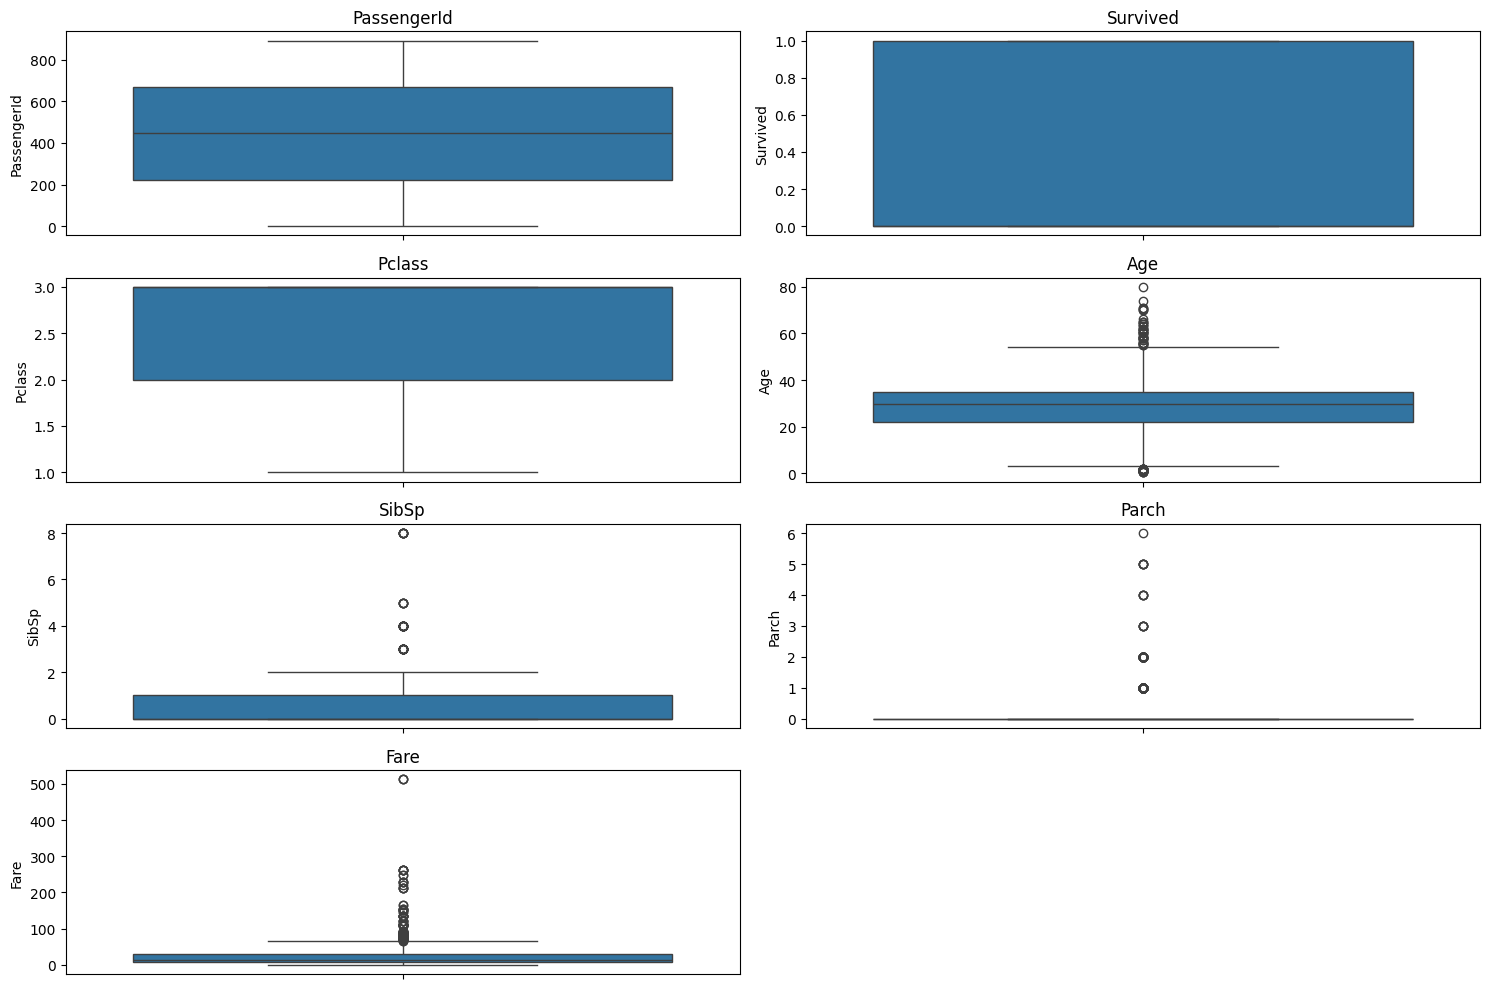

In [149]:
def plot_all_boxplots(tita):
    # Selecting  numerical columns
    numeric_cols = tita.select_dtypes(include=['float64', 'int64']).columns

    # Setting the size of the overall plot
    plt.figure(figsize=(15, 10))

    # Creating a boxplot for each numerical column
    for i, col in enumerate(numeric_cols):
        plt.subplot(len(numeric_cols) // 2 + 1, 2, i + 1)
        sns.boxplot(y=tita[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()

# Calling the function to plot boxplots
plot_all_boxplots(tita)

In [150]:
print("Original dataset shape:", tita.shape)

Original dataset shape: (891, 12)


In [151]:
def remove_outliers(tita):
    numeric_cols = tita.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = tita[col].quantile(0.25)
        Q3 = tita[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        tita = tita[(tita[col] >= lower_bound) & (tita[col] <= upper_bound)]
    return tita

# Removing outliers from the dataset
tita = remove_outliers(tita)

# Displaying the shape of the dataset after removing outliers
print("Cleaned dataset shape:", tita.shape)

Cleaned dataset shape: (561, 12)


In [152]:
tita.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96 B98,Q


In [153]:
# removing cols that does not have an impact
tita=tita.drop(['Cabin','Name','Ticket'],axis=1)
tita.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q


# Encoding

In [154]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()

In [155]:
tita.nunique()

PassengerId    561
Survived         2
Pclass           3
Sex              2
Age             56
SibSp            3
Parch            1
Fare           144
Embarked         3
dtype: int64

In [156]:
# encoding cols sex and embarked using label encoder

tita['Sex'] = label_en.fit_transform(tita['Sex'])
tita['Embarked'] = label_en.fit_transform(tita['Embarked'])
tita.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
5,6,0,3,1,29.699118,0,0,8.4583,1


# Scaling

In [157]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [158]:
X=tita.drop(columns=['Survived'])
y=tita['Survived']

In [159]:
X_scaled = sc.fit_transform(X)
X_scaled[:10]

array([[-1.72499128,  0.66921221,  0.57391976, -0.90343438,  1.83939883,
         0.        , -0.61395677,  0.54035134],
       [-1.7172895 ,  0.66921221, -1.74240386, -0.42877436, -0.4335147 ,
         0.        , -0.54998239,  0.54035134],
       [-1.71343862, -2.12207439, -1.74240386,  0.6392107 ,  1.83939883,
         0.        ,  3.73156283,  0.54035134],
       [-1.70958773,  0.66921221,  0.57391976,  0.6392107 , -0.4335147 ,
         0.        , -0.53813528,  0.54035134],
       [-1.70573684,  0.66921221,  0.57391976,  0.01018146, -0.4335147 ,
         0.        , -0.49943788, -0.86306117],
       [-1.70188596, -2.12207439,  0.57391976,  2.89384582, -0.4335147 ,
         0.        ,  3.61427645,  0.54035134],
       [-1.6903333 , -0.72643109, -1.74240386, -1.85275443,  1.83939883,
         0.        ,  1.54892728, -2.26647369],
       [-1.67878064,  0.66921221,  0.57391976, -1.14076439, -0.4335147 ,
         0.        , -0.53813528,  0.54035134],
       [-1.67107886,  0.66921221

# Model Building

In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [161]:
k_nn = KNeighborsClassifier(n_neighbors=5)
Svm = SVC(kernel='sigmoid')

# Importing K-fold & Stratified K-fold

In [162]:
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score
k_fo = KFold(n_splits=5, shuffle=True, random_state=42)
s_kfo= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Finding avg accuracy of Svm & K-nn using k-fold & strat k-fold

In [163]:
knn_scores = cross_val_score(k_nn, X_scaled, y, cv=k_fo, scoring='accuracy')
print('Avg accuracy of K-nn with K-fold is :',np.mean(knn_scores))

Avg accuracy of K-nn with K-fold is : 0.8199747155499368


In [164]:
svm_scores = cross_val_score(Svm, X_scaled, y, cv=k_fo, scoring='accuracy')
print('Avg accuracy of Svm with K-fold is :',np.mean(svm_scores))

Avg accuracy of Svm with K-fold is : 0.7595132743362831


In [165]:
knn_stratified_scores = cross_val_score(k_nn, X_scaled, y, cv=s_kfo, scoring='accuracy')
print("Average accuracy of K-nn with stratified k-fold cross-validation: ", np.mean(knn_stratified_scores))

Average accuracy of K-nn with stratified k-fold cross-validation:  0.8128002528445005


In [166]:
svm_stratified_scores = cross_val_score(Svm, X_scaled, y, cv=s_kfo, scoring='accuracy')
print("Average accuracy of Svm with stratified k-fold cross-validation: ", np.mean(svm_stratified_scores))

Average accuracy of Svm with stratified k-fold cross-validation:  0.7861251580278129
